## Face Detection in OpenCV

본 예제는 OpenCV로 딥러닝이 아닌 방법으로 얼굴을 검출하는 방법에 대한 예시를 보여주고 있음.
사용한 방법은 Haar Cascades를 이용한 방법임

원본코드는 여기에 있음:

https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_objdetect/py_face_detection/py_face_detection.html

In [4]:
# 밑의 코드는 google colab에서 OpenCV로 face detection하고자 하기 위한 utils모듈을 사용하기 위해 필요함.
# install pnslib
!pip install git+git://github.com/PnS2019/pnslib.git
!wget https://pns2019.github.io/images/Lenna.png

  Cloning git://github.com/PnS2019/pnslib.git to /tmp/pip-req-build-fq7rjmh3
  Running command git clone -q git://github.com/PnS2019/pnslib.git /tmp/pip-req-build-fq7rjmh3
  Created wheel for pnslib: filename=pnslib-0.1.0a1-cp36-none-any.whl size=1489619 sha256=54aaa34e96da776a88f0e5f37114b186805bb7ad14552895e4f25c61d6923265
  Stored in directory: /tmp/pip-ephem-wheel-cache-1kr636rl/wheels/a2/8e/a9/c62e72840009deaa723b3a113d5c3b90acac77098d16e90eca
Successfully built pnslib
--2021-02-01 11:43:42--  https://pns2019.github.io/images/Lenna.png
Resolving pns2019.github.io (pns2019.github.io)... 185.199.110.153, 185.199.111.153, 185.199.108.153, ...
Connecting to pns2019.github.io (pns2019.github.io)|185.199.110.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 473831 (463K) [image/png]
Saving to: ‘Lenna.png.2’

Lenna.png.2         100%[===================>] 462.73K  --.-KB/s    in 0.05s   

2021-02-01 11:43:42 (10.0 MB/s) - ‘Lenna.png.2’ saved [473831/473831]



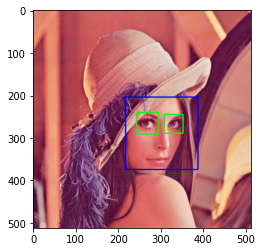

In [5]:
import cv2
from pnslib import utils
import matplotlib.pyplot as plt

# read image
img = cv2.imread("Lenna.png")

# load face cascade and eye cascade
face_cascade = cv2.CascadeClassifier(
    utils.get_haarcascade_path('haarcascade_frontalface_default.xml'))
eye_cascade = cv2.CascadeClassifier(
    utils.get_haarcascade_path('haarcascade_eye.xml'))

# search face
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

faces = face_cascade.detectMultiScale(gray, 1.3, 5)

for (x, y, w, h) in faces:
    cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex, ey, ew, eh) in eyes:
        cv2.rectangle(roi_color, (ex, ey), (ex+ew, ey+eh), (0, 255, 0), 2)


img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure()
plt.imshow(img)
plt.show()